In [19]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from kNN import kNN_predict

# load the microchips dataset
with open("./resources/datasets/microchips.csv", 'r') as f:
    reader = csv.reader(f)
    data = list(reader)
    
# define global variables
k_values = [1, 3, 5, 7]
T = np.array(data, dtype=float)
x1 = T[:, 0]
x2 = T[:, 1]
z = T[:, 2]
cmap = ListedColormap(['r', 'g']) # color map for labels 0 and 1 respectively

## Exercise 1: k-NN Classification
In Lecture 1 we used as an example the Iris2D dataset for classifying three subspecies of the flower Iris based on petal and sepal leaf areas. We also presented a figure showing the original dataset and the decision boundary with corresponding training error for **k = 1, 3, 5**.

<center><image src="./resources/images/figure1.jpg" width="600"/></center>

In this exercise you should create a similar figure for the dataset in microchips.csv containing data related to an attempt to identify flaws in a microchip based on two numerical chip properties. Each row in the file represents one microchip and contains three comma separated values, the two properties and an integer (1 or 0) indicating if the microchip turned out to be OK (1) or Failed (0).


Create a program Microchips that:  

**1.** Plot the original microchip data using different markers for the two classes OK and Fail. Faulty microchips are marked with the <span style="color:red">red</span> color and the <span style="color:green">green</span> one for the ok ones.

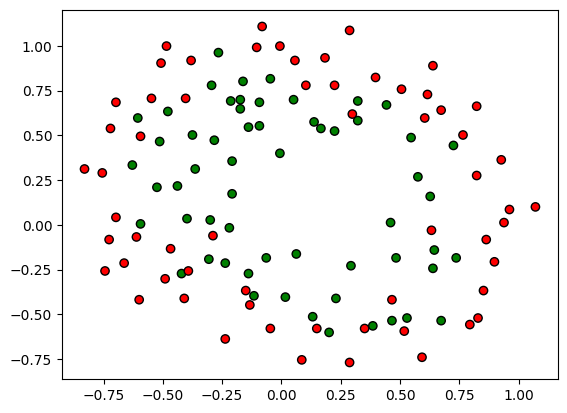

In [20]:
# scatter the points and show the plot
plt.scatter(x1, x2, c=z, edgecolors='k', cmap=cmap)
plt.show()

**2.** Implement and use k-NN to predict whether three unknown microchips are likely to be OK or Fail. The properties associated with the three unknown microchips are **(−0.3, 1.0)**, **(−0.5, −0, 1)**, and **(0.6, 0.0)**, and you should repeat the experiments for **k = 1, 3, 5, 7**. Hence, a total of
12 predictions. For example, for k = 5 the print out might look like:
```python
    k = 5
    chip1: [-0.3, 1.0] ==> Fail
    chip2: [-0.5, -0.1] ==> OK
    chip3: [0.6, 0.0] ==> OK
```

In [21]:
chips = [[-0.3, 1.0], [-0.5, -0.1], [0.6, 0.0]]
for i, k in enumerate(k_values):
    labels = kNN_predict(T, chips, k)
    print(f"k = {k}")
    for j, chip in enumerate(chips):
        print(f"chip{j+1}: {chip} ==> {"OK" if labels[j] == 1.0 else "Fail"}")
    print()

k = 1
chip1: [-0.3, 1.0] ==> OK
chip2: [-0.5, -0.1] ==> Fail
chip3: [0.6, 0.0] ==> Fail

k = 3
chip1: [-0.3, 1.0] ==> Fail
chip2: [-0.5, -0.1] ==> Fail
chip3: [0.6, 0.0] ==> OK

k = 5
chip1: [-0.3, 1.0] ==> Fail
chip2: [-0.5, -0.1] ==> OK
chip3: [0.6, 0.0] ==> OK

k = 7
chip1: [-0.3, 1.0] ==> Fail
chip2: [-0.5, -0.1] ==> Fail
chip3: [0.6, 0.0] ==> OK



**3.** Display a 2 ×2 plot similar to Figure 1 showing the decision boundary and the training error for **k = 1, 3, 5, 7**

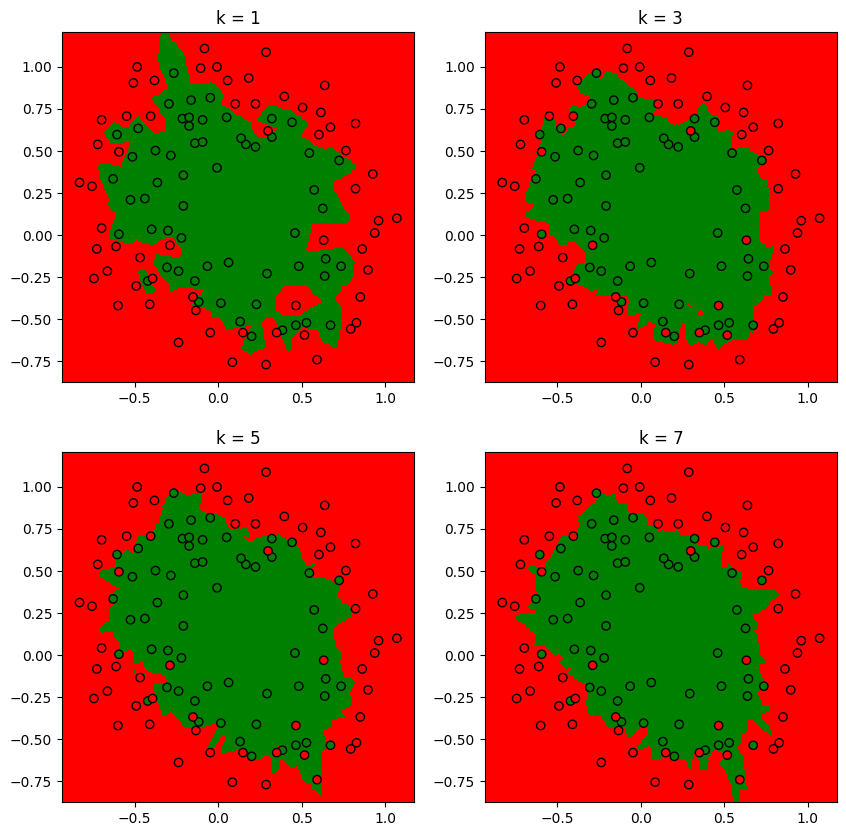

In [23]:
# defining mesh grids boundaries
margin = 0.1
x_min, x_max = x1.min() - margin, x1.max() + margin
y_min, y_max = x2.min() - margin, x2.max() + margin

# creating mesh grid for the plot
x_mesh, y_mesh = np.meshgrid(
    np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01)
)

# creating the plot
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs = axs.ravel()

mesh_points = np.c_[x_mesh.ravel(), y_mesh.ravel()]
for i, k in enumerate(k_values):
    mesh_labels = kNN_predict(T, mesh_points, k)
    reshaped_labels = mesh_labels.reshape(x_mesh.shape)
    axs[i].pcolormesh(x_mesh, y_mesh, reshaped_labels, cmap=cmap)
    axs[i].scatter(x1, x2, c=z, edgecolors='k', cmap=cmap)
    axs[i].set_title(f"k = {k}")